In [ ]:
import pandas as pd
import gdown

# Use the direct Google Drive download URL
url = "https://drive.google.com/drive/u/1/folders/1J0qS5eHCydWYe86GjA0MWh_2-c9e3TNB"
output = "first_file.bed"

# Download the file
gdown.download(url, output, quiet=False)

# Now read the file with pandas

bed_df = pd.read_csv(output, sep='\t', header=None)
print(bed_df.head(10))

# Read the BED file (assuming it has no header and the standard 3-column format for BED files)
# If it has more columns, pandas will load them all
bed_df = pd.read_csv(bed_file_path, sep='\t', header=None)

# Display the first 10 rows
print(bed_df.head(10))





/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/drive/u/1/folders/1J0qS5eHCydWYe86GjA0MWh_2-c9e3TNB
To: /content/first_file.bed
1.19MB [00:00, 12.4MB/s]


                                                   0
0  <!doctype html><html class="hcfe" data-page-ty...
1            window['start'] = new Date().getTime();
2      if (window.performance && window.performan...
3    </script> <script src="https://www.google-an...
4          window.dataLayer = window.dataLayer ||...
5          function gtag(){window.dataLayer.push(...
6                                window.gtag = gtag;
7                            gtag('js', new Date());
8                           gtag('config', ga4_id, {
9                             'helpcenter': hc_name,


NameError: name 'bed_file_path' is not defined

In [1]:
import pandas as pd

# List of local file paths for your BED files
bed_file_paths = ['/content/GSE190102_H3K27ac_WT12_pseudo1.sorted.bed', '/content/GSE190102_H3K27ac_WT12_pseudo2.sorted.bed', '/content/GSE190102_H3K27ac_WT12_pseudo3.sorted.bed']

# Loop through each file path, read the file, and display the first 10 rows
for file_path in bed_file_paths:
    bed_df = pd.read_csv(file_path, sep='\t', header=None)
    print(f"Contents of {file_path}:")
    print(bed_df.head(10))
    print("\n" + "-"*40 + "\n")  # Separator between files for readability


Contents of /content/GSE190102_H3K27ac_WT12_pseudo1.sorted.bed:
      0        1        2         3
0  chr1        0  3000000  0.000000
1  chr1  3000000  3000010  0.460987
2  chr1  3000010  3000080  0.921973
3  chr1  3000080  3000090  1.382960
4  chr1  3000090  3000210  1.843950
5  chr1  3000210  3000220  0.921973
6  chr1  3000220  3000280  1.843950
7  chr1  3000280  3000300  1.382960
8  chr1  3000300  3000320  0.921973
9  chr1  3000320  3000430  1.382960

----------------------------------------

Contents of /content/GSE190102_H3K27ac_WT12_pseudo2.sorted.bed:
      0        1        2         3
0  chr1        0  3000190  0.000000
1  chr1  3000190  3000400  0.460969
2  chr1  3000400  3000490  0.000000
3  chr1  3000490  3000690  0.460969
4  chr1  3000690  3000780  0.000000
5  chr1  3000780  3000970  0.460969
6  chr1  3000970  3000990  1.382910
7  chr1  3000990  3001080  0.921938
8  chr1  3001080  3001100  1.843880
9  chr1  3001100  3001120  2.304840

------------------------------------

First few rows of /content/GSE190102_H3K27ac_WT12_pseudo1.sorted.bed:
  Chromosome    Start      End    Signal
0       chr1        0  3000000  0.000000
1       chr1  3000000  3000010  0.460987
2       chr1  3000010  3000080  0.921973
3       chr1  3000080  3000090  1.382960
4       chr1  3000090  3000210  1.843950
No data found for chromosome 1 in the first million bases in /content/GSE190102_H3K27ac_WT12_pseudo1.sorted.bed.
First few rows of /content/GSE190102_H3K27ac_WT12_pseudo2.sorted.bed:
  Chromosome    Start      End    Signal
0       chr1        0  3000190  0.000000
1       chr1  3000190  3000400  0.460969
2       chr1  3000400  3000490  0.000000
3       chr1  3000490  3000690  0.460969
4       chr1  3000690  3000780  0.000000
No data found for chromosome 1 in the first million bases in /content/GSE190102_H3K27ac_WT12_pseudo2.sorted.bed.
First few rows of /content/GSE190102_H3K27ac_WT12_pseudo3.sorted.bed:
  Chromosome    Start        End    Signal
0       chr1        0  300000

No data found for chromosome 1 in the first million bases in /content/GSE190102_H3K27ac_WT12_pseudo3.sorted.bed.


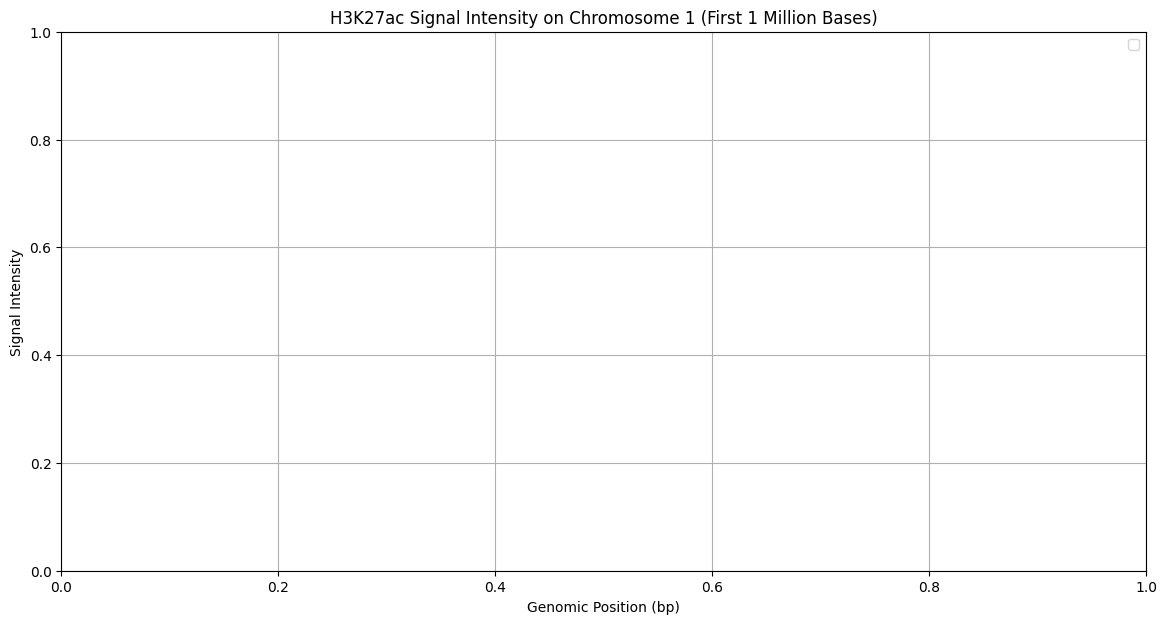

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Define paths to your BED files
file_paths = [
    '/content/GSE190102_H3K27ac_WT12_pseudo1.sorted.bed',
    '/content/GSE190102_H3K27ac_WT12_pseudo2.sorted.bed',
    '/content/GSE190102_H3K27ac_WT12_pseudo3.sorted.bed'
]

# Initialize plot
plt.figure(figsize=(14, 7))

# Loop through each file and plot
for i, file_path in enumerate(file_paths):
    # Load data
    bed_df = pd.read_csv(file_path, sep='\t', header=None)
    bed_df.columns = ['Chromosome', 'Start', 'End', 'Signal']

    # Debug: Check the first few rows of the dataframe
    print(f"First few rows of {file_path}:")
    print(bed_df.head())

    # Filter for the first million bases on chromosome 1
    filtered_df = bed_df[(bed_df['Chromosome'] == 'chr1') & (bed_df['End'] <= 1000000)]

    # Debug: Check if the filtered data is empty
    if filtered_df.empty:
        print(f"No data found for chromosome 1 in the first million bases in {file_path}.")
    else:
        # Plot signal intensity
        plt.plot(filtered_df['Start'], filtered_df['Signal'], label=f'Replicate {i + 1}', linewidth=0.8)

# Customize plot
plt.xlabel('Genomic Position (bp)')
plt.ylabel('Signal Intensity')
plt.title('H3K27ac Signal Intensity on Chromosome 1 (First 1 Million Bases)')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


<ipython-input-8-89c1ff32a8ae>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Chromatin_State'] = hidden_states


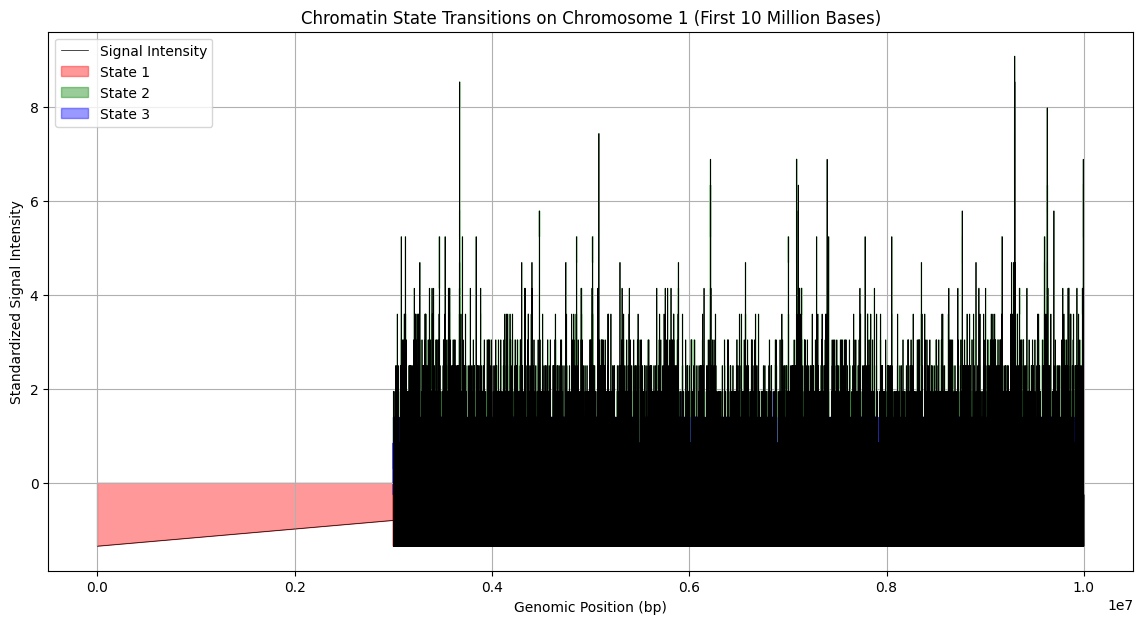

Transition Matrix:
[[8.57101295e-01 9.39932752e-16 1.42898705e-01]
 [1.11916553e-12 7.90671159e-01 2.09328841e-01]
 [2.28586560e-01 6.53414339e-02 7.06072006e-01]]

Means of each state (chromatin state levels):
[[-0.64739928]
 [ 1.92334336]
 [ 0.43525946]]


In [8]:
import pandas as pd
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load and preprocess the BED file data
file_path = '/content/GSE190102_H3K27ac_WT12_pseudo1.sorted.bed'
bed_df = pd.read_csv(file_path, sep='\t', header=None)
bed_df.columns = ['Chromosome', 'Start', 'End', 'Signal']

# Filter for a larger region of chromosome 1 (e.g., first 10 million bases)
filtered_df = bed_df[(bed_df['Chromosome'] == 'chr1') & (bed_df['End'] <= 10000000)]

# Check if there is enough data after filtering
if len(filtered_df) < 3:
    raise ValueError("Not enough data points after filtering. Consider increasing the range.")

# Standardize the signal intensity for better HMM training
scaler = StandardScaler()
filtered_df.loc[:, 'Signal'] = scaler.fit_transform(filtered_df[['Signal']])

# Prepare data for HMM - reshape signal intensity as a 2D array
X = filtered_df['Signal'].values.reshape(-1, 1)

# Define and train the Hidden Markov Model
n_states = 3  # Assuming three chromatin states: low, medium, high
model = hmm.GaussianHMM(n_components=n_states, covariance_type="full", n_iter=100)

# Fit the model only if there are enough data points
if len(X) >= n_states:
    model.fit(X)
    hidden_states = model.predict(X)

    # Add hidden states to the DataFrame for analysis
    filtered_df['Chromatin_State'] = hidden_states

    # Plot the signal intensities with chromatin states to visualize transitions
    plt.figure(figsize=(14, 7))

    # Plot the raw signal
    plt.plot(filtered_df['Start'], filtered_df['Signal'], color='black', linewidth=0.5, label='Signal Intensity')

    # Color-code the chromatin states
    colors = ['red', 'green', 'blue']  # Define colors for each state
    for state in range(n_states):
        plt.fill_between(
            filtered_df['Start'],
            filtered_df['Signal'],
            where=(filtered_df['Chromatin_State'] == state),
            color=colors[state],
            alpha=0.4,
            label=f'State {state + 1}'
        )

    # Customize plot
    plt.xlabel('Genomic Position (bp)')
    plt.ylabel('Standardized Signal Intensity')
    plt.title('Chromatin State Transitions on Chromosome 1 (First 10 Million Bases)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Output summary of state transition matrix and means for each state
    print("Transition Matrix:")
    print(model.transmat_)

    print("\nMeans of each state (chromatin state levels):")
    print(model.means_)
else:
    print("Not enough data points to train the HMM model.")


In [6]:
!pip install hmmlearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 3.1 MB/s eta 0:00:00
